Image Recognition with Machine Learning. I will be using the TorchVision package which contains some of the best performing neural network architectures for computer vision, such as AlexNet

In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

To run the AlexNet architecture on an input image, we can create an instance of the AlexNet class. 

In [2]:
alexnet = models.AlexNet()

In [7]:
resnet = models.resnet101(pretrained=True)
resnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 194MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Performing some of the basic preprocessing functions using Torchvision modules.

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

IMAGE RECOGNITION

Saving dogg.jfif to dogg (1).jfif


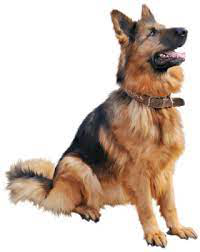

In [5]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("/content/dogg.jfif")
img

Preprocess


In [6]:
img_t = preprocess(img)

In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-7.0705e-01, -2.1424e+00, -3.2741e+00, -3.3505e+00, -3.4800e+00,
         -1.0857e+00, -4.6279e+00, -1.7016e+00, -7.3102e-01, -1.1101e+00,
          4.5647e-01, -2.0215e+00, -2.4680e+00, -2.3802e+00, -2.9014e+00,
         -1.3035e+00, -1.3429e+00, -5.4496e-01, -2.5963e+00, -1.2795e-01,
         -2.2777e+00,  1.4522e+00, -2.5444e+00, -7.8659e-01, -2.1950e+00,
          1.5602e+00,  3.7061e-01, -3.3029e-01, -8.1138e-02, -4.1981e-01,
         -1.7833e+00, -1.9880e+00,  4.3027e-01,  1.0009e-01, -1.5617e+00,
         -6.8103e-01, -5.6937e-01, -1.0044e+00,  4.7890e-01, -2.2420e+00,
         -3.2613e+00, -1.0254e+00,  1.7464e-01, -3.3207e-01, -8.0842e-01,
         -2.3254e-01, -2.8811e+00, -1.5104e+00, -3.7023e+00, -1.6399e+00,
         -1.0922e+00, -5.9811e-02,  1.0672e+00,  4.6402e-01, -2.3608e-01,
         -3.2104e+00, -2.5759e+00, -2.2913e-01, -4.8222e-02, -5.7167e-01,
          8.9595e-01, -2.5735e+00, -8.6375e-02,  2.0774e+00, -1.8705e+00,
          5.8313e-02,  9.5048e-02, -1.

Inferences for this Image Recognition Model

In [11]:
with open('/content/imagenet-classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('German shepherd, German shepherd dog, German police dog, alsatian',
 85.48471069335938)